## Python Frontend
This notebook demonstrates the Python frontend to MPB.

In [4]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
from copy import deepcopy
mpb = MPB()
mpb["ompl.seed"] = 5  # set the seed of the OMPL planners
folder_prefix = "/home/ksatyaki/workspace/bench_ws/src/bench-mr/"
mpb.set_image_yaml_env(folder_prefix + "maps/atc.yaml")
mpb.set_planners(['rrt_star'])

#start: {x: 47.690, y: -18.848, theta: -2.356}
#goal: {x: -19.575, y: 12.390, theta: 2.313}
mpb.set_start(47.690, -18.848, -2.356)
mpb.set_goal(-19.575, 12.390, 2.313)
mpb.set_steer_functions(['car'])

cost_fn = 'dtc'
map_type = 'cliff'

mpb["env.collision.robot_shape_source"] = folder_prefix + "maps/simple_robot.yaml"
mpb["steer.car_turning_radius"] = 0.5
mpb["steer.sampling_resolution"] = 0.01

mpb["ompl.sampler"] = "intensity"
mpb.set_id("intensity-{}".format(cost_fn))
mpb["ompl.intensity_map_file_name"] = folder_prefix + "maps/atc_intensity1m.xml"
mpb["ompl.optimization_objective"] = cost_fn
mpb["mod.mod_file_name"] = folder_prefix + "maps/atc_{}.xml".format(map_type)
mpb["max_planning_time"] = 30

mpb_uniform = deepcopy(mpb)
mpb_uniform.set_id("uniform-{}".format(cost_fn))
mpb_uniform["ompl.sampler"] = "iid"
pool = MultipleMPB()
pool.benchmarks.append(mpb)
pool.benchmarks.append(mpb_uniform)

Run the motion planning benchmark:

In [5]:
pool.run_parallel(runs=10, id='{}-intensity-vs-uniform'.format(cost_fn), show_plot=False)
pool.merge('{}-intensity-vs-uniform/{}-intensity-vs-uniform.json'.format(cost_fn, cost_fn), plan_names=['RRT* (uniform-{})'.format(cost_fn), 'RRT* (intensity-{})'.format(cost_fn)])

Available memory: 6.57 GB, limiting each MPB process to 41.7% usage (2.74 GB).
Creating pool of 2 processes.
Running MPB with ID intensity-dtc (log file at dtc-intensity-vs-uniform/intensity-dtc.log)...Running MPB with ID uniform-dtc (log file at dtc-intensity-vs-uniform/uniform-dtc.log)...



uniform-dtc:   0%|          | 0/10 [00:00<?, ?it/s]

intensity-dtc:   0%|          | 0/10 [00:00<?, ?it/s]

Benchmark 1 (uniform-dtc) finished successfully.
Benchmark 0 (intensity-dtc) finished successfully.
All benchmarks succeeded.
Successfully merged [dtc-intensity-vs-uniform/intensity-dtc_results.json, dtc-intensity-vs-uniform/uniform-dtc_results.json] into dtc-intensity-vs-uniform/dtc-intensity-vs-uniform.json.


Visualize the planner trajectories:

Visualizing dtc-intensity-vs-uniform/dtc-intensity-vs-uniform.json
Saved MoD-planning-paths.pdf.


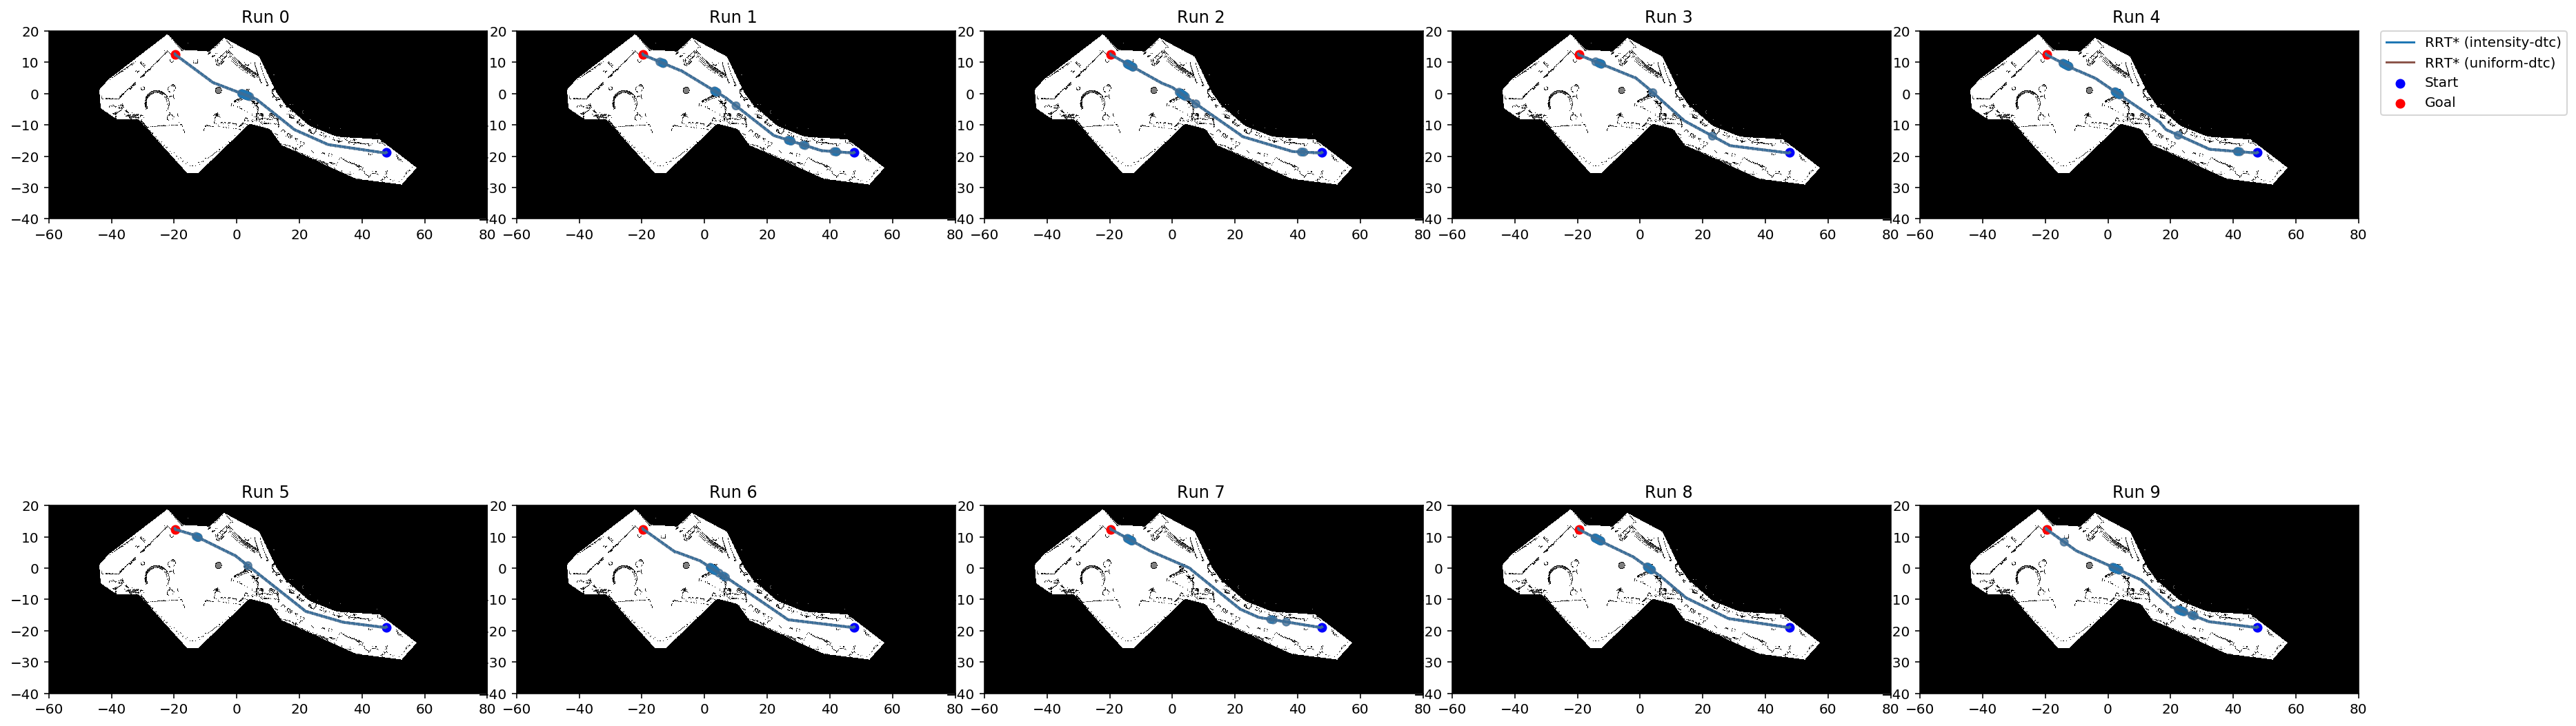

In [6]:
from trajectory import visualize
visualize('{}-intensity-vs-uniform/{}-intensity-vs-uniform.json'.format(cost_fn, cost_fn), save_file="MoD-planning-paths.pdf")

Plot planner statistics:

Visualizing dtc-intensity-vs-uniform/dtc-intensity-vs-uniform.json...


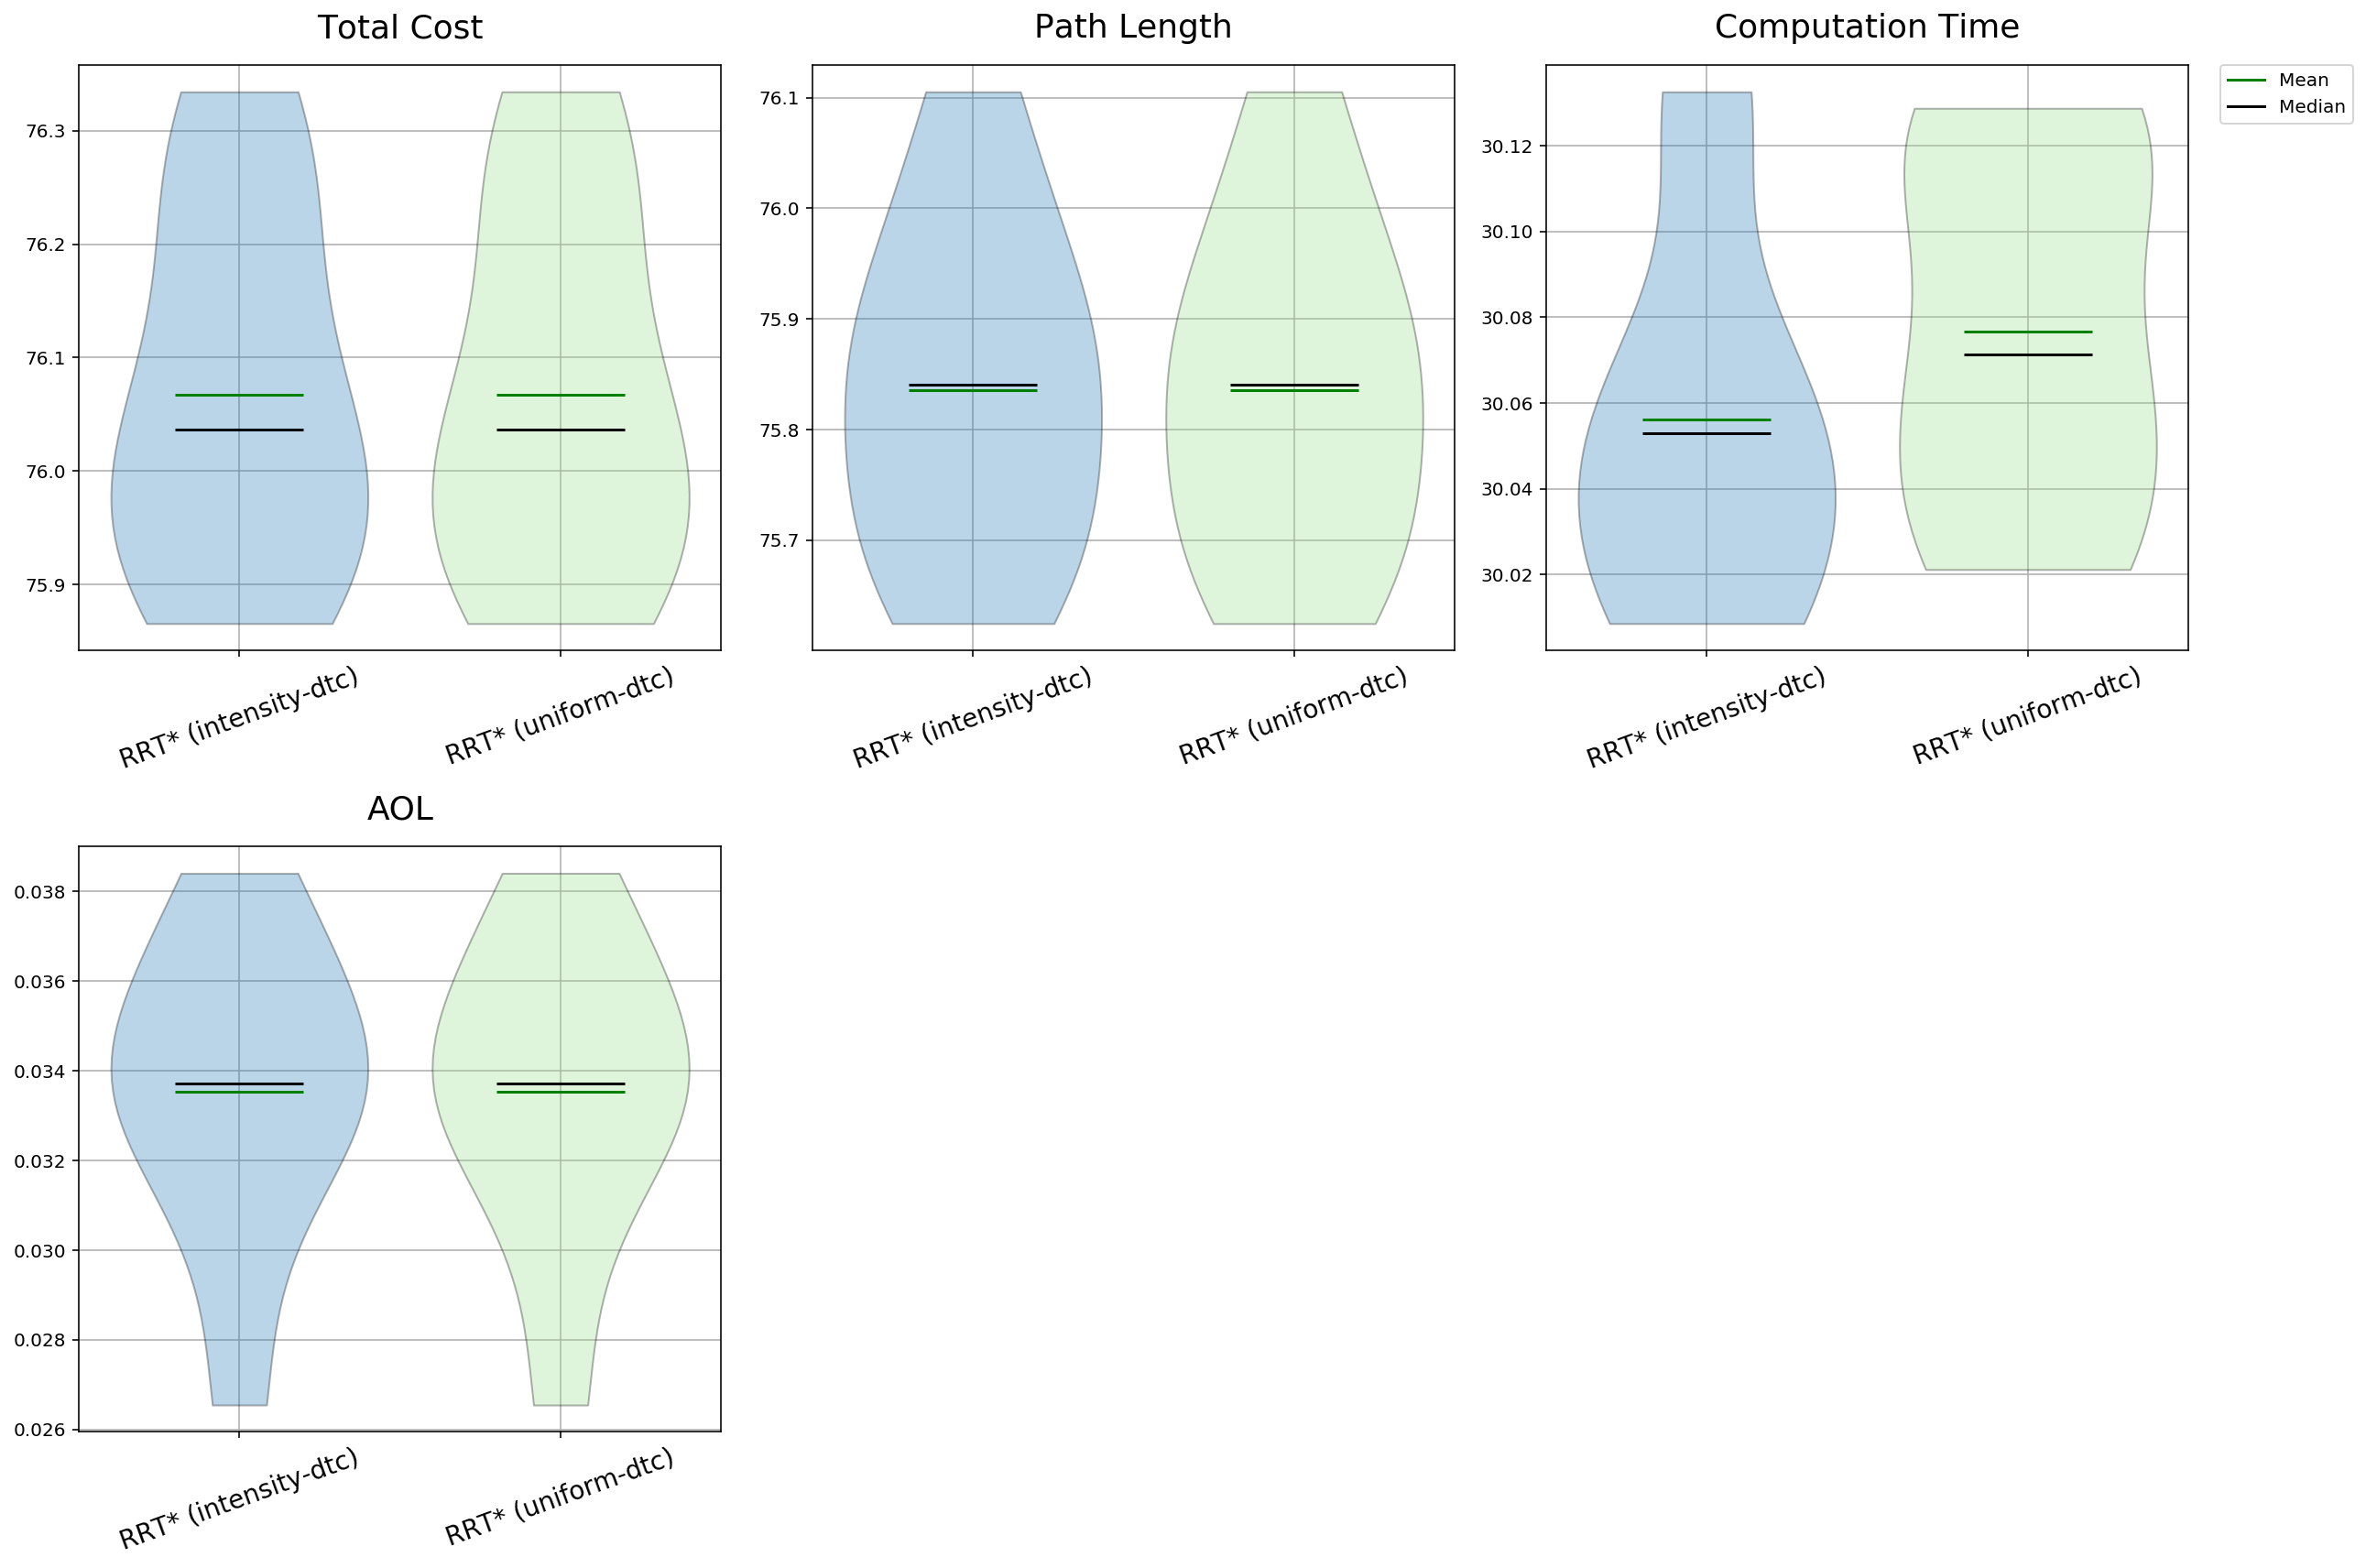

In [7]:
from plot_stats import plot_planner_stats

plot_planner_stats('{}-intensity-vs-uniform/{}-intensity-vs-uniform.json'.format(cost_fn, cost_fn), metrics='total_cost,path_length,planning_time,aol', num_colors=4, ticks_rotation=20)

Visualizing dtc-intensity-vs-uniform/dtc-intensity-vs-uniform.json...
+++++++++++++++++++++++++ Run #9 (1 / 1) +++++++++++++++++++++++++
+ Steering:        Car 
+ Environment:     MRPT Grid-map
+ Planners:        RRT* (uniform-dtc), RRT* (intensity-dtc)
+ Found solution:  2 / 2
+ Exact solution:  2 / 2
+ Found colliding: 2 / 2
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



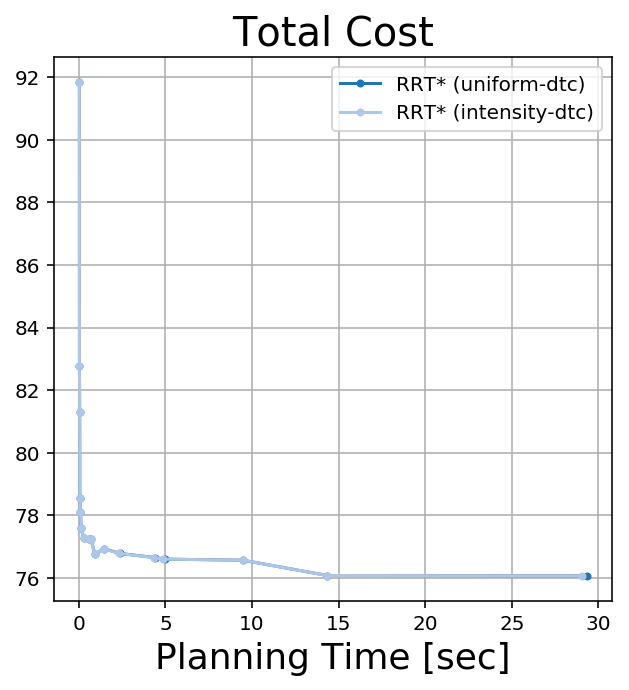

In [11]:
from plot_convergence import plot_convergence
plot_convergence('{}-intensity-vs-uniform/{}-intensity-vs-uniform.json'.format(cost_fn, cost_fn), metrics='total_cost', combine_views=True, run_id="9")